In [4]:
import pandas as pd

columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
'Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
sep='\t',
usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [5]:
df.shape

(2930, 6)

In [6]:
df['Central Air']=df['Central Air'].map({'N':0,'Y':1})

In [8]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [9]:
df=df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [1]:
import matplotlib.pyplot as plt
from mltxend.plotting import scatterplotmatrix
scatterplotmatrix(df.values,figsize=(12,10),names=df.columns,alpha=0.5)
plt.tight_layout()

ModuleNotFoundError: No module named 'mltxend'

In [21]:
import numpy as np
class LinearRegressionGD:
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=X.shape[1])
        self.b_=np.array([0.])
        self.losses_=[]
        
        for i in range(self.n_iter):
            output=self.net_input(X)
            errors=(y-output)
            self.w_+=self.eta*2.0*X.T.dot(errors)/X.shape[0]
            self.b_+=self.eta*2.0*errors.mean()
            loss=(errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self,X):
        return np.dot(X,self.w_)+self.b_
    
    def predict(self,X):
        return self.net_input(X)


In [22]:
X=df[['Gr Liv Area']].values
y=df['SalePrice'].values
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
sc_y=StandardScaler()
X_std=sc_x.fit_transform(X)
y_std=sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr=LinearRegressionGD(eta=0.1)
lr.fit(X_std,y_std)

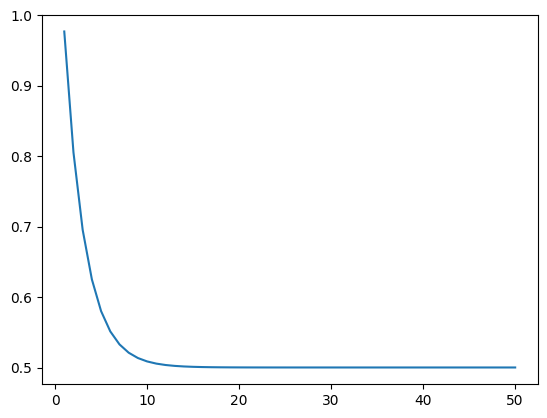

In [23]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.show()

In [24]:
def lin_regplot(X,y,model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

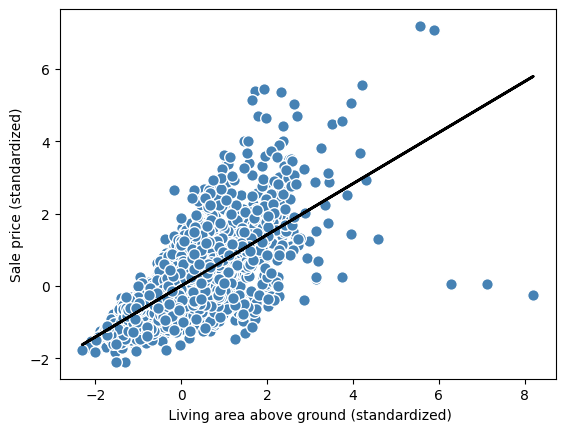

In [25]:
lin_regplot(X_std, y_std, lr)
plt.xlabel(' Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()

In [27]:
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'Sales price: ${target_reverted.flatten()[0]:.2f}')
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept: {lr.b_[0]:.3f}')

Sales price: $292507.07
Slope: 0.707
Intercept: -0.000


In [28]:
from sklearn.linear_model import LinearRegression
slr=LinearRegression(n_jobs=-1)
slr.fit(X,y)
y_pred=slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

Slope: 111.666
Intercept: 13342.979


In [30]:
from sklearn.linear_model import RANSACRegressor
ransac=RANSACRegressor(LinearRegression(),min_samples=0.95,random_state=123)
ransac.fit(X,y)

,estimator,LinearRegression()
,min_samples,0.95
,residual_threshold,None
,is_data_valid,None
,is_model_valid,None
,max_trials,100
,max_skips,inf
,stop_n_inliers,inf
,stop_score,inf
,stop_probability,0.99
,loss,'absolute_error'


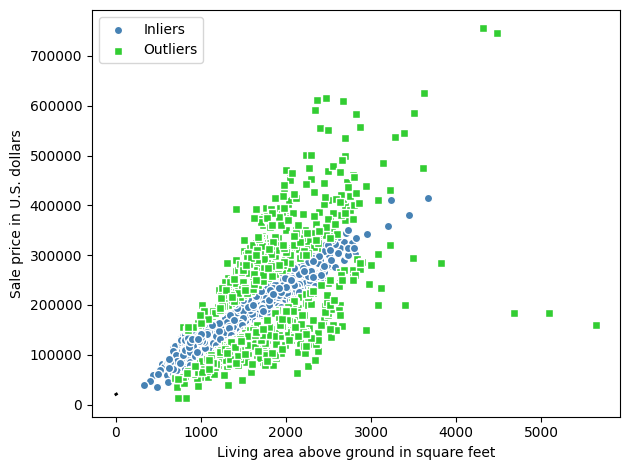

In [31]:

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],

 c='steelblue', edgecolor='white',

 marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],

 c='limegreen', edgecolor='white',

marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 106.348
Intercept: 20190.093


In [33]:
def median_absolute_deviation(data):
 return np.median(np.abs(data - np.median(data)))
median_absolute_deviation(y)

np.float64(37000.0)

In [38]:
from sklearn.model_selection import train_test_split
target='SalePrice'
features=df.columns[df.columns!=target]
X=df[features].values
y=df[target].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
slr=LinearRegression()
slr.fit(X_train,y_train)
y_train_pred=slr.predict(X_train)
y_test_pred=slr.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1497216245.85
MSE test: 1516565821.00


In [41]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MSE train: {mae_train:.2f}')
print(f'MSE test: {mae_test:.2f}')

MSE train: 25983.03
MSE test: 24921.29


In [42]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 train: {train_r2:.3f}, {test_r2:.3f}')

R^2 train: 0.769, 0.752


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0,
368.0, 396.0, 446.0, 480.0, 586.0])\
[:, np.newaxis]

y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2,
342.2, 360.8, 368.0, 391.2, 390.8])
lr=LinearRegression()
pr=LinearRegression()
quadratic=PolynomialFeatures(degree=2)
X_quad=quadratic.fit_transform(X)

In [46]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]
regr=LinearRegression()

quadratic=PolynomialFeatures(degree=2)
cubic=PolynomialFeatures(degree=3)
X_quad=quadratic.fit_transform(X)
X_cubic=cubic.fit_transform(X)

X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

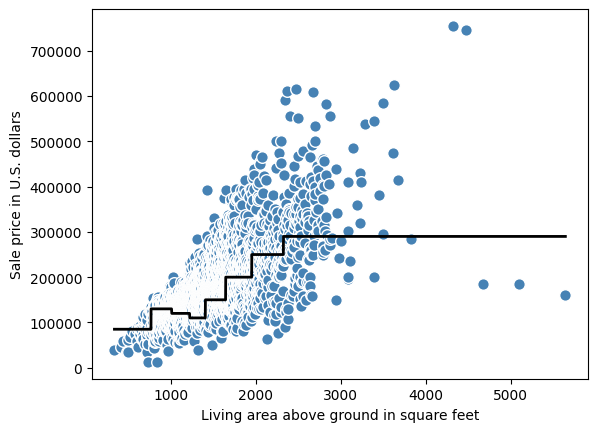

In [52]:
from sklearn.tree import DecisionTreeClassifier
X=df[['Gr Liv Area']].values
y=df['SalePrice'].values
tree=DecisionTreeClassifier(max_depth=3)
tree.fit(X,y)
sort_idx=X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.show()

In [55]:
target='SalePrice'
features=df.columns[df.columns!=target]
X=df[features].values
y=df[target].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=1000,n_jobs=-1,random_state=1,criterion='squared_error')
forest.fit(X_train,y_train)
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')
r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

MAE train: 8305.18
MAE test: 20821.77
R^2 train: 0.98
R^2 test: 0.85
